In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress



In [55]:
csv_path = '../Resources/crime_df.csv'
crime_df = pd.read_csv(csv_path)
crime_df["Zip Code"] = crime_df['Zip Code'].astype(float)
crime_df["Offense Type"] = crime_df['Offense Type'].astype(str)
crime_df["Offense Category"] = crime_df['Offense Category'].astype(str)

In [56]:
crime_df.head()

,Unnamed: 0,Offense Type,Offense Category,Reported Date,Zip Code
0,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,80239.0
1,1,theft-other,larceny,1/29/2018 5:53:00 PM,80239.0
2,2,theft-items-from-vehicle,theft-from-motor-vehicle,4/26/2016 9:02:00 PM,80210.0
3,3,theft-other,larceny,1/30/2018 10:29:00 PM,80246.0
4,4,theft-shoplift,larceny,6/23/2017 4:09:00 PM,80206.0


In [57]:
#take the final zip codes that were calculated by the realty data
csv_zip = '../Resources/25 Final Zip Codes.csv'
ziplist = pd.read_csv(csv_zip)

ziplist1 = ziplist['zip'].tolist()

In [58]:
crime_df['Offense Category'].unique()

array(['all-other-crimes', 'larceny', 'theft-from-motor-vehicle',
       'drug-alcohol', 'auto-theft', 'white-collar-crime', 'burglary',
       'public-disorder', 'aggravated-assault',
       'other-crimes-against-persons', 'robbery', 'sexual-assault',
       'murder', 'arson'], dtype=object)

In [59]:
#make a list of the final five zip codes
finalzip = [80401,80211,80002,80204,80212]
#filter by violent crime types and group by the final 5 zip codes:
violent = crime_df.loc[(crime_df['Offense Category'] == 'aggravated assault')| (crime_df['Offense Category'] == 'murder')|
                          (crime_df['Offense Category'] == 'robbery') | (crime_df['Offense Category'] == 'sexual-assault')|
                          (crime_df['Offense Category'] == 'arson')]
#take only the data for the final five zips
violent_filter = violent.loc[violent['Zip Code'].isin(finalzip)]
violent_group = violent_filter.groupby('Zip Code').count()
violent_group = violent_group.reset_index()

In [60]:
violent_lib = {'Zip Code': violent_group['Zip Code'].tolist(), "Violent Crimes 2016-2019": violent_group['Reported Date'].tolist()}
violent_crimes = pd.DataFrame(violent_lib)
# violent_crimes.to_csv('Resources/violent_crime_final_zips.csv')

In [61]:
#use .loc to filter out the non violent crime categories
nonviolent = crime_df.loc[(crime_df['Offense Category'] == 'all-other-crimes')|(crime_df['Offense Category'] == 'larceny')|
                         (crime_df['Offense Category'] == 'theft-from-motor-vehicle')|(crime_df['Offense Category'] == 'auto-theft')|
                         (crime_df['Offense Category'] == 'drug-alcohol')| (crime_df['Offense Category'] == 'white-collar-crime')|
                         (crime_df['Offense Category'] == 'burglary')|(crime_df['Offense Category'] == 'public-disorder')|(crime_df['Offense Category'] == 'other-crimes-against-persons')]
#return data for only the final zip codes
nonviolent_filter = nonviolent.loc[nonviolent['Zip Code'].isin(finalzip)]
nonviolent_group = nonviolent_filter.groupby('Zip Code').count()
nonviolent_group = nonviolent_group.reset_index()


In [62]:
#build a library and dataframe for the grouped data to use for the "Mark Score" calculation
nonviolent_lib = {"Zip Code" : nonviolent_group['Zip Code'].tolist(), "Violent Crimes 2016-2019" : nonviolent_group['Reported Date'].tolist()}
nonviolent_crimes = pd.DataFrame(nonviolent_lib)
nonviolent_crimes.to_csv('../Resources/nonviolent_crime_final_zips.csv')

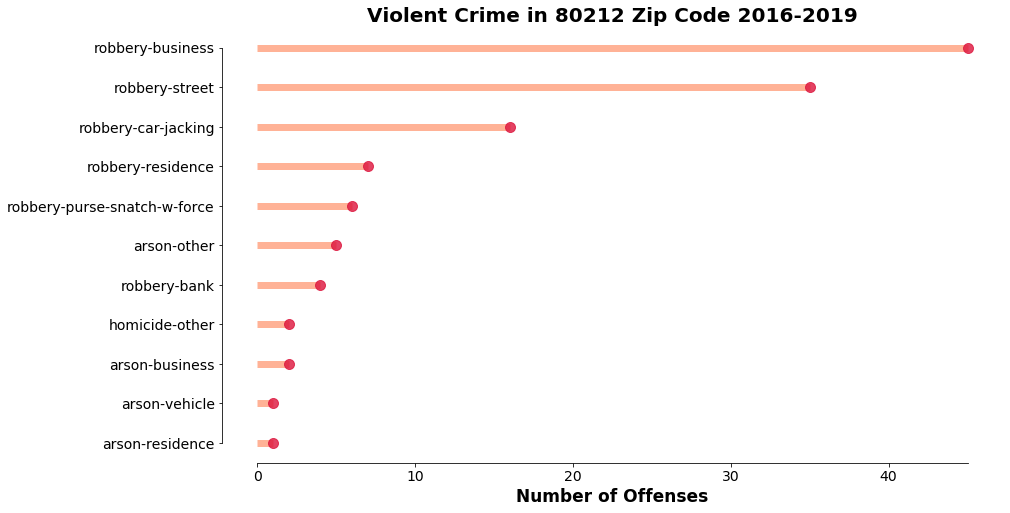

In [63]:
#Plot violent crimes for zip code 80212
vplot = violent.loc[violent['Zip Code'] == 80212]
vplot = vplot.sort_values(by='Offense Type', ascending = False).groupby(['Offense Type'])['Zip Code'].count()
vplot = vplot.reset_index()
vplot = vplot.sort_values('Zip Code')
vplot = vplot.set_index('Offense Type')

#designate horizontal bar, using the index
vplot.plot(kind='barh', use_index = True, legend = False, ax=ax)
#set the figure size
fig, ax = plt.subplots(figsize=(14,8))

#make a list for the range of y, for making y limit equal to length of index in the df +1
y_range=list(range(1,len(vplot.index)+1))

#plot horizontal lines for the graph
plt.hlines(y=y_range, xmin=0, xmax=vplot['Zip Code'], color='coral', alpha=0.6, linewidth=7)
#add a dot to the end of the lines
plt.plot(vplot['Zip Code'], y_range, "o", markersize=10, color='crimson', alpha=0.8)
#set 
ax.tick_params(axis='both', which='major', direction = "out", labelsize=14)
plt.yticks(y_range, vplot.index)
#set labels and font sizes
ax.set_xlabel('Number of Offenses 2016-2019')
ax.set_xlabel('Number of Offenses', fontsize=17, fontweight='black', color = 'black')
ax.set_title("Violent Crime in 80212 Zip Code 2016-2019", fontsize = 20, fontweight = 'black', color = 'black')
#remove the right and top of the graph and set smart bounds
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
plt.savefig('../Images/Violent Crime in 80212.png')

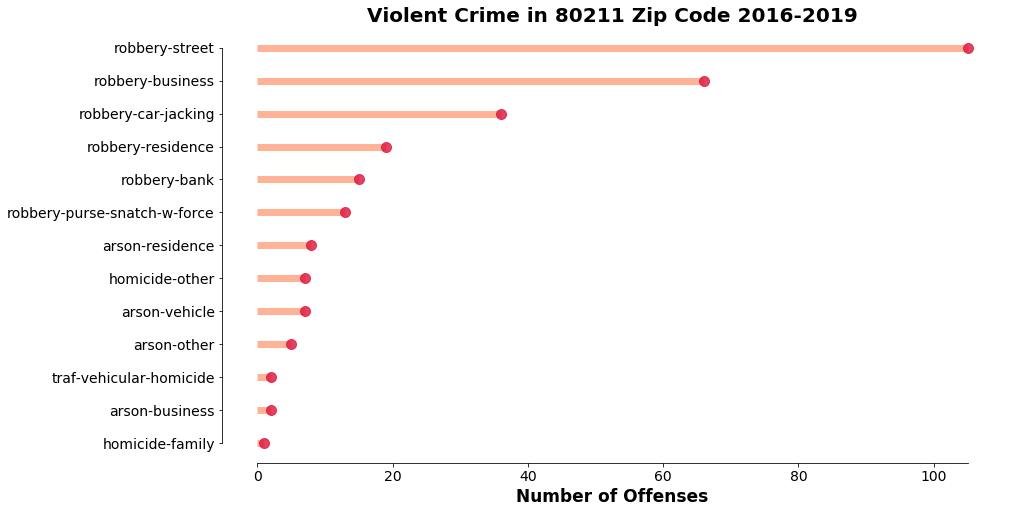

In [64]:
#Plot violent crimes for zip code 80211
vplot = violent.loc[violent['Zip Code'] == 80211]
vplot = vplot.sort_values(by='Offense Type', ascending = False).groupby(['Offense Type'])['Zip Code'].count()
vplot = vplot.reset_index()
vplot = vplot.sort_values('Zip Code')
vplot = vplot.set_index('Offense Type')


vplot.plot(kind='barh', use_index = True, legend = False, ax=ax)

fig, ax = plt.subplots(figsize=(14,8))

y_range=list(range(1,len(vplot.index)+1))


plt.hlines(y=y_range, xmin=0, xmax=vplot['Zip Code'], color='coral', alpha=0.6, linewidth=7)

plt.plot(vplot['Zip Code'], y_range, "o", markersize=10, color='crimson', alpha=0.8)

ax.tick_params(axis='both', which='major', direction = "out", labelsize=14)
plt.yticks(y_range, vplot.index)

ax.set_xlabel('Number of Offenses 2016-2019')
ax.set_xlabel('Number of Offenses', fontsize=17, fontweight='black', color = 'black')
ax.set_title("Violent Crime in 80211 Zip Code 2016-2019", fontsize = 20, fontweight = 'black', color = 'black')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
plt.savefig('Violent Crime in 80211')

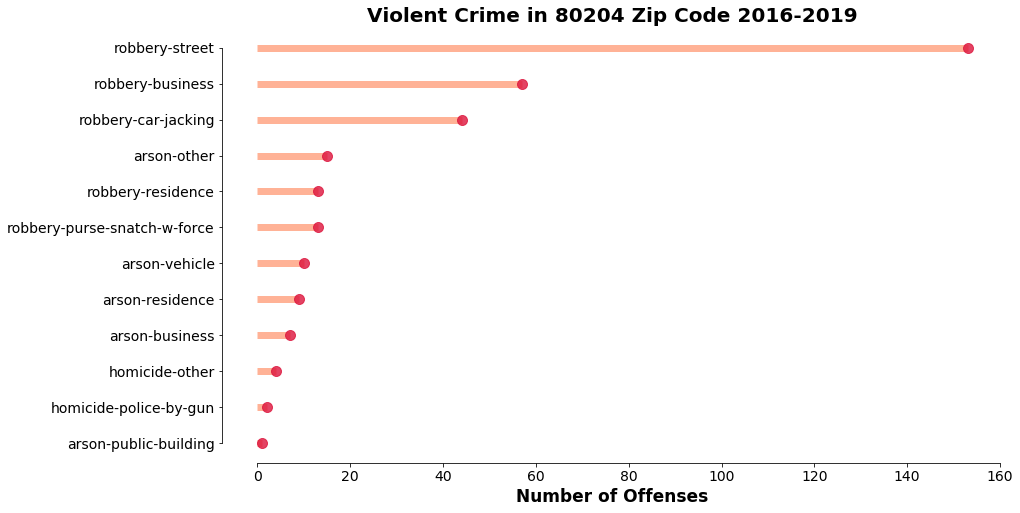

In [65]:
#Plot violent crimes for zip code 80204
vplot = violent.loc[violent['Zip Code'] == 80204]

vplot = vplot.sort_values(by='Offense Type', ascending = False).groupby(['Offense Type'])['Zip Code'].count()
vplot = vplot.reset_index()
vplot = vplot.sort_values('Zip Code')
vplot = vplot.set_index('Offense Type')


vplot.plot(kind='barh', use_index = True, legend = False, ax=ax)

fig, ax = plt.subplots(figsize=(14,8))

y_range=list(range(1,len(vplot.index)+1))


plt.hlines(y=y_range, xmin=0, xmax=vplot['Zip Code'], color='coral', alpha=0.6, linewidth=7)

plt.plot(vplot['Zip Code'], y_range, "o", markersize=10, color='crimson', alpha=0.8)

ax.tick_params(axis='both', which='major', direction = "out", labelsize=14)
plt.yticks(y_range, vplot.index)

ax.set_xlabel('Number of Offenses 2016-2019')
ax.set_xlabel('Number of Offenses', fontsize=17, fontweight='black', color = 'black')
ax.set_title("Violent Crime in 80204 Zip Code 2016-2019", fontsize = 20, fontweight = 'black', color = 'black')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
plt.savefig('../Images/Violent Crime in 80204.png')

In [66]:
finalzip = [80401,80211,80002,80204,80212]

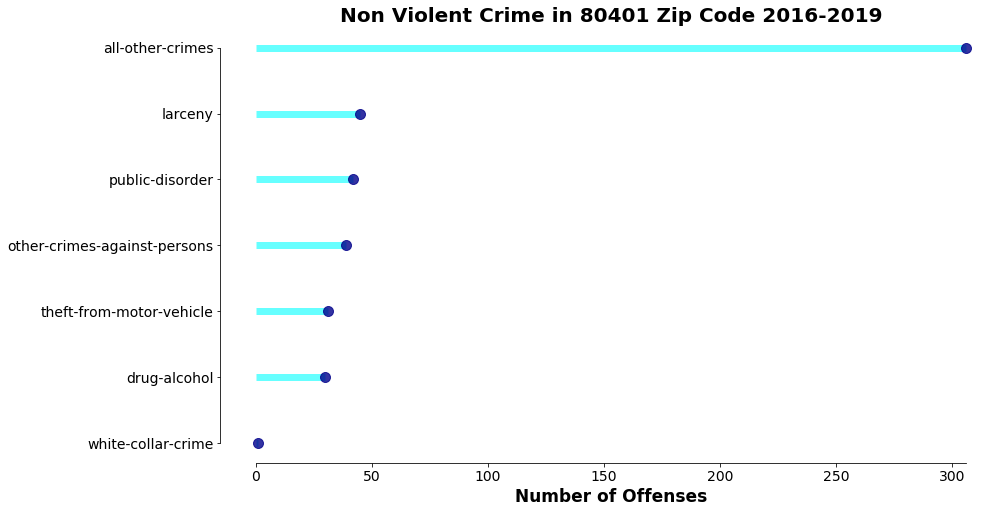

In [67]:
#Plot nonviolent crimes for zip code 80401
nvplot = nonviolent.loc[nonviolent['Zip Code'] == 80401]
nvplot = nvplot.sort_values(by='Offense Category', ascending = False).groupby(['Offense Category'])['Zip Code'].count()
nvplot = nvplot.reset_index()
nvplot = nvplot.sort_values('Zip Code')
nvplot = nvplot.set_index('Offense Category')


nvplot.plot(kind='bar', use_index = True, legend = False, ax=ax)

fig, ax = plt.subplots(figsize=(14,8))

y_range=list(range(1,len(nvplot.index)+1))


plt.hlines(y=y_range, xmin=0, xmax=nvplot['Zip Code'], color='cyan', alpha=0.6, linewidth=7)

plt.plot(nvplot['Zip Code'], y_range, "o", markersize=10, color='darkblue', alpha=0.8)

ax.tick_params(axis='both', which='major', direction = "out", labelsize=14)
plt.yticks(y_range, nvplot.index)

ax.set_xlabel('Number of Offenses 2016-2019')
ax.set_xlabel('Number of Offenses', fontsize=17, fontweight='black', color = 'black')
ax.set_title("Non Violent Crime in 80401 Zip Code 2016-2019", fontsize = 20, fontweight = 'black', color = 'black')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
plt.savefig('../Images/Non Violent Crime in 80401.png')

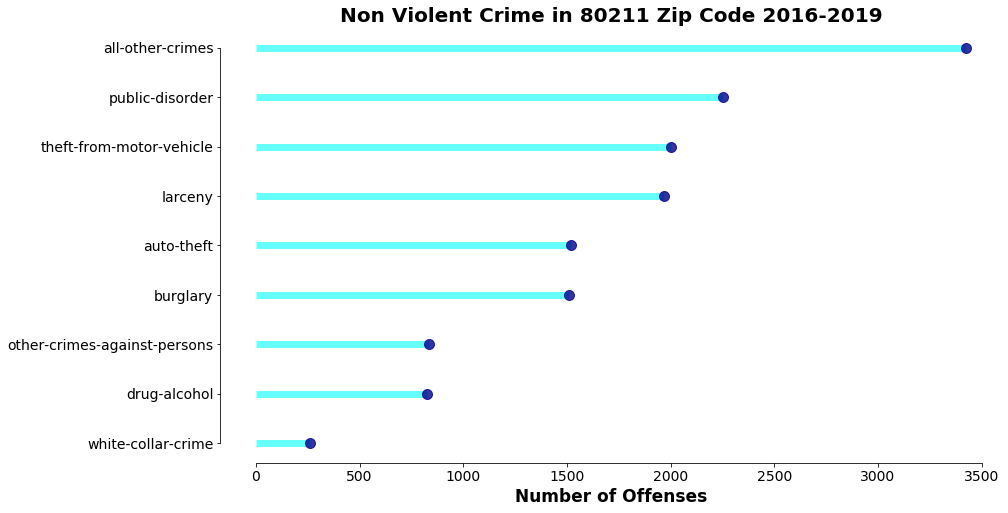

In [68]:
#Plot nonviolent crimes for zip code 80211
nvplot = nonviolent.loc[nonviolent['Zip Code'] == 80211]
nvplot = nvplot.sort_values(by='Offense Category', ascending = False).groupby(['Offense Category'])['Zip Code'].count()
nvplot = nvplot.reset_index()
nvplot = nvplot.sort_values('Zip Code')
nvplot = nvplot.set_index('Offense Category')


nvplot.plot(kind='bar', use_index = True, legend = False, ax=ax)

fig, ax = plt.subplots(figsize=(14,8))

y_range=list(range(1,len(nvplot.index)+1))


plt.hlines(y=y_range, xmin=0, xmax=nvplot['Zip Code'], color='cyan', alpha=0.6, linewidth=7)

plt.plot(nvplot['Zip Code'], y_range, "o", markersize=10, color='darkblue', alpha=0.8)

ax.tick_params(axis='both', which='major', direction = "out", labelsize=14)
plt.yticks(y_range, nvplot.index)

ax.set_xlabel('Number of Offenses 2016-2019')
ax.set_xlabel('Number of Offenses', fontsize=17, fontweight='black', color = 'black')
ax.set_title("Non Violent Crime in 80211 Zip Code 2016-2019", fontsize = 20, fontweight = 'black', color = 'black')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
plt.savefig('../Images/Non Violent Crime in 80211.png')

In [69]:
# #Plot nonviolent crimes for zip code 80002
# nvplot = nonviolent.loc[nonviolent['Zip Code'] == 80002]
# nvplot = nvplot.sort_values(by='Offense Category', ascending = False).groupby(['Offense Category'])['Zip Code'].count()
# nvplot = nvplot.reset_index()
# nvplot = nvplot.sort_values('Zip Code')
# nvplot = nvplot.set_index('Offense Category')


# nvplot.plot(kind='bar', use_index = True, legend = False, ax=ax)

# fig, ax = plt.subplots(figsize=(14,8))

# y_range=list(range(1,len(nvplot.index)+1))


# plt.hlines(y=y_range, xmin=0, xmax=nvplot['Zip Code'], color='cyan', alpha=0.6, linewidth=7)

# plt.plot(nvplot['Zip Code'], y_range, "o", markersize=10, color='darkblue', alpha=0.8)

# ax.tick_params(axis='both', which='major', direction = "out", labelsize=14)
# plt.yticks(y_range, nvplot.index)

# ax.set_xlabel('Number of Offenses 2016-2019')
# ax.set_xlabel('Number of Offenses', fontsize=17, fontweight='black', color = 'black')
# ax.set_title("Non Violent Crime in 80002 Zip Code 2016-2019", fontsize = 20, fontweight = 'black', color = 'black')
# ax.spines['top'].set_color('none')
# ax.spines['right'].set_color('none')
# ax.spines['left'].set_smart_bounds(True)
# ax.spines['bottom'].set_smart_bounds(True)

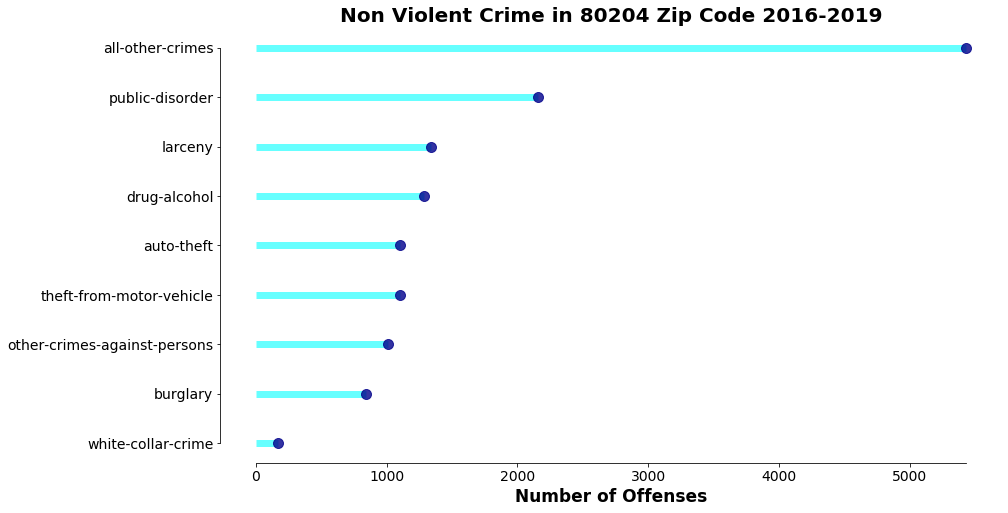

In [70]:
#Plot nonviolent crimes for zip code 80204
nvplot = nonviolent.loc[nonviolent['Zip Code'] == 80204]
nvplot = nvplot.sort_values(by='Offense Category', ascending = False).groupby(['Offense Category'])['Zip Code'].count()
nvplot = nvplot.reset_index()
nvplot = nvplot.sort_values('Zip Code')
nvplot = nvplot.set_index('Offense Category')


nvplot.plot(kind='bar', use_index = True, legend = False, ax=ax)

fig, ax = plt.subplots(figsize=(14,8))

y_range=list(range(1,len(nvplot.index)+1))


plt.hlines(y=y_range, xmin=0, xmax=nvplot['Zip Code'], color='cyan', alpha=0.6, linewidth=7)

plt.plot(nvplot['Zip Code'], y_range, "o", markersize=10, color='darkblue', alpha=0.8)

ax.tick_params(axis='both', which='major', direction = "out", labelsize=14)
plt.yticks(y_range, nvplot.index)

ax.set_xlabel('Number of Offenses 2016-2019')
ax.set_xlabel('Number of Offenses', fontsize=17, fontweight='black', color = 'black')
ax.set_title("Non Violent Crime in 80204 Zip Code 2016-2019", fontsize = 20, fontweight = 'black', color = 'black')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
plt.savefig('../Images/Non Violent Crime in 80204.png')

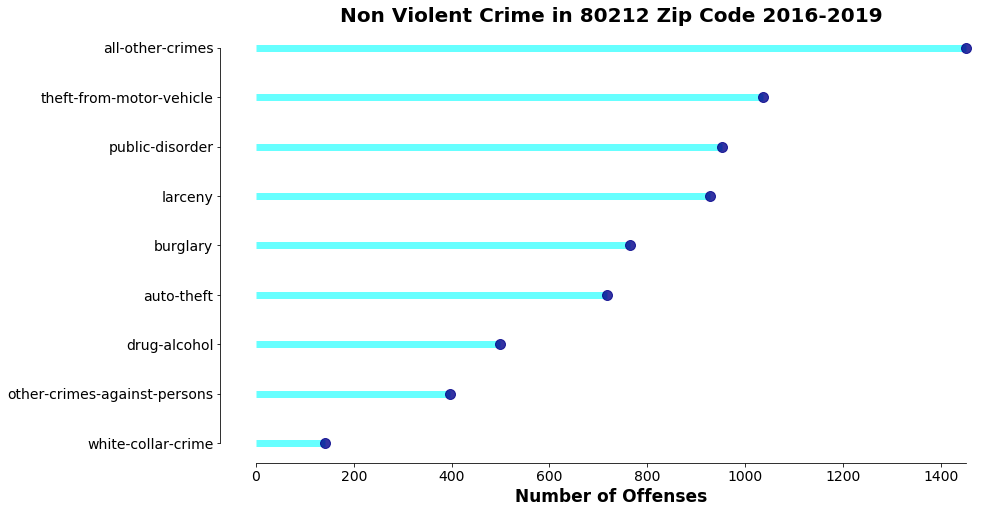

In [71]:
#Plot nonviolent crimes for zip code 80212
nvplot = nonviolent.loc[nonviolent['Zip Code'] == 80212]
nvplot = nvplot.sort_values(by='Offense Category', ascending = False).groupby(['Offense Category'])['Zip Code'].count()
nvplot = nvplot.reset_index()
nvplot = nvplot.sort_values('Zip Code')
nvplot = nvplot.set_index('Offense Category')


nvplot.plot(kind='bar', use_index = True, legend = False, ax=ax)

fig, ax = plt.subplots(figsize=(14,8))

y_range=list(range(1,len(nvplot.index)+1))


plt.hlines(y=y_range, xmin=0, xmax=nvplot['Zip Code'], color='cyan', alpha=0.6, linewidth=7)

plt.plot(nvplot['Zip Code'], y_range, "o", markersize=10, color='darkblue', alpha=0.8)

ax.tick_params(axis='both', which='major', direction = "out", labelsize=14)
plt.yticks(y_range, nvplot.index)

ax.set_xlabel('Number of Offenses 2016-2019')
ax.set_xlabel('Number of Offenses', fontsize=17, fontweight='black', color = 'black')
ax.set_title("Non Violent Crime in 80212 Zip Code 2016-2019", fontsize = 20, fontweight = 'black', color = 'black')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
plt.savefig('Non Violent Crime in 80212')